In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df_medical = pd.read_csv('medical_examination.csv')
df_medical

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [78]:
df_medical['alco'][df_medical['cardio']==1].value_counts()

0    33156
1     1823
Name: alco, dtype: int64

In [79]:
df_medical['BMI'] = (df_medical['weight']/(df_medical['height']*df_medical['height']/100/100)).round(2)
df_medical.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01


In [80]:
df_medical['overweight'] = None
df_medical.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,None
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,None
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,None
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,None
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,None


In [81]:
df_medical['overweight'] = 0
df_medical['overweight'][df_medical['BMI'] > 25] = 1
df_medical.head()

<ipython-input-81-e62c402d17bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medical['overweight'][df_medical['BMI'] > 25] = 1


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,0


In [130]:
df_medical.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,0


In [136]:
df_cat = df_medical.drop(columns=['age','gender','ap_hi', 'ap_lo','BMI','height', 'weight'])
df_cat['cholesterol'] = df_cat['cholesterol'].apply(update_value)
df_cat['gluc'] = df_cat['gluc'].apply(update_value)
df_cat

,id,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,1,1,0,0,1,0,0
1,1,1,1,0,0,1,1,1
2,2,1,1,0,0,0,1,0
3,3,1,1,0,0,1,1,1
4,4,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
69995,99993,1,1,1,0,1,0,1
69996,99995,1,1,0,0,1,1,1
69997,99996,1,1,0,1,0,1,1
69998,99998,1,1,0,0,0,1,1


In [168]:
df_cat1 = df_cat[df_cat['cardio']==1]
df_cat2 = df_cat[df_cat['cardio']==0]

df_cat1

,id,cholesterol,gluc,smoke,alco,active,cardio,overweight
1,1,1,1,0,0,1,1,1
2,2,1,1,0,0,0,1,0
3,3,1,1,0,0,1,1,1
7,12,1,1,0,0,1,1,1
15,24,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...
69993,99991,1,1,0,0,1,1,0
69994,99992,1,1,0,0,1,1,1
69996,99995,1,1,0,0,1,1,1
69997,99996,1,1,0,1,0,1,1


In [115]:
def update_value(x):
    if x > 0:
        return 1
    else:
        return 0

In [170]:
df_cat2['overweight'].value_counts()

1    19106
0    15915
Name: overweight, dtype: int64

In [ ]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = None


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = None

    # Draw the catplot with 'sns.catplot()'



    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [ ]:
# Draw Categorical Plot
def draw_cat_plot():
    df_cat = pd.DataFrame(data=pd.melt(df,id_vars='cardio',value_vars=['cholesterol', 'gluc', 'smoke','alco', 'active', 'overweight']))
    
    cat_order = [
        'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'
    ]
    fig = sns.catplot(x='variable',
                      hue='value',
                      data=df_cat,
                      kind='count',
                      col='cardio',
                      order=cat_order)
    
    fig.set_ylabels('total')
    
    fig.savefig('catplot.png')
    
    fig = fig.fig
    return fig


In [174]:
df_cat_cat = pd.DataFrame(data=pd.melt(df_medical,id_vars='cardio',value_vars=['cholesterol', 'gluc', 'smoke','alco', 'active', 'overweight']))
df_cat_cat

,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,3
2,1,cholesterol,3
3,1,cholesterol,1
4,0,cholesterol,1
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [177]:
cat_order = [
        'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']

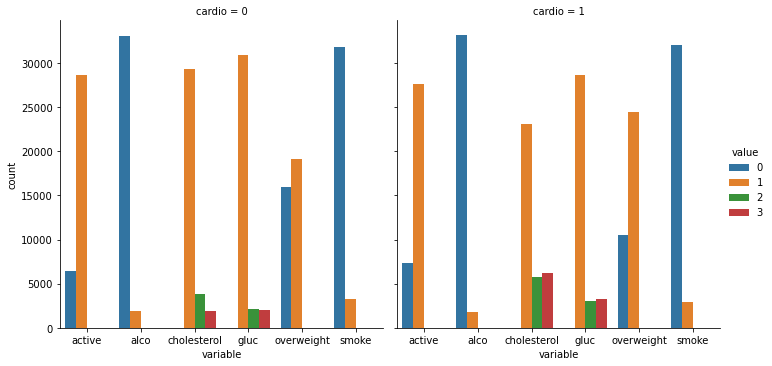

In [186]:
sns.catplot(x='variable',hue='value', data=df_cat_cat, kind='count', col='cardio', order=cat_order);

In [187]:
df = pd.read_csv('medical_examination.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [216]:
df_false = df.where(((df['ap_lo'] <= df['ap_hi'])) ==False)
df_false.dropna(inplace= True)
df_false['id'] = df_false['id'].apply(lambda x : int(x))
list_f_id = list(df_false['id'])



In [224]:
for i in list_f_id:
    df = df.drop(df[df['id']== i].index)
        

In [231]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [233]:
df.where((df['ap_lo'] <= df['ap_hi'])==False).dropna()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [223]:
df_false1 = df_false.drop(df_false[df_false['id'] == 314].index )
df_false1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
241,334,21932.0,2.0,157.0,60.0,160.0,1000.0,2.0,1.0,0.0,0.0,0.0,1.0
260,357,18217.0,1.0,150.0,83.0,140.0,800.0,1.0,1.0,0.0,0.0,1.0,1.0
329,458,23407.0,1.0,176.0,63.0,160.0,1000.0,2.0,2.0,0.0,0.0,0.0,1.0
345,482,18704.0,1.0,154.0,81.0,140.0,1000.0,2.0,1.0,0.0,0.0,1.0,1.0
473,680,15226.0,1.0,150.0,95.0,150.0,1033.0,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330.0,1.0,167.0,81.0,160.0,1000.0,1.0,1.0,0.0,0.0,1.0,1.0
69872,99798,21808.0,1.0,152.0,56.0,160.0,1000.0,1.0,1.0,0.0,0.0,1.0,1.0
69878,99807,21239.0,2.0,168.0,95.0,160.0,1000.0,1.0,1.0,0.0,0.0,1.0,1.0
69885,99816,22417.0,2.0,166.0,78.0,170.0,1000.0,1.0,1.0,0.0,0.0,0.0,0.0


In [234]:
# clean df = without (df['ap_lo'] > df['ap_hi'])
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [237]:
df['height'].quantile(0.025), min(df['height'])

(150.0, 55)

In [239]:
 df['height'].quantile(0.975), max(df['height'])

(180.0, 250)

In [ ]:
# drop indexes have the height < 150 and height > 180

In [243]:
df = df.drop(df[df['height']<150].index)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [244]:
df = df.drop(df[df['height']>180].index)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [240]:
df['weight'].quantile(0.975), max(df['weight'])

(107.0, 200.0)

In [241]:
df['weight'].quantile(0.025), max(df['weight'])

(51.0, 200.0)

In [ ]:
# drop indexes have the weight < 51 and weight > 107

In [245]:
df = df.drop(df[df['weight']>107].index)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [246]:
df = df.drop(df[df['weight']<51].index)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [253]:
df['overweight'] = 0

df['overweight'][df['weight']/df['height']/df['height']*10000 > 25] = 1
df


<ipython-input-253-cd8cc391607a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overweight'][df['weight']/df['height']/df['height']*10000 > 25] = 1


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [264]:
#correlation in this df
df_corr = df.corr()
df_corr.round(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000,0.003,0.003,0.000,0.000,0.004,0.001,0.006,0.002,-0.003,-0.001,0.006,0.004,-0.001
age,0.003,1.000,-0.018,-0.077,0.070,0.019,0.153,0.155,0.098,-0.044,-0.027,-0.012,0.240,0.089
gender,0.003,-0.018,1.000,0.505,0.131,0.005,0.060,-0.039,-0.023,0.337,0.169,0.008,0.002,-0.053
height,0.000,-0.077,0.505,1.000,0.252,0.005,0.017,-0.066,-0.028,0.187,0.089,-0.005,-0.024,-0.150
weight,0.000,0.070,0.131,0.252,1.000,0.027,0.227,0.135,0.093,0.055,0.059,-0.014,0.169,0.657
ap_hi,0.004,0.019,0.005,0.005,0.027,1.000,0.073,0.021,0.010,-0.002,0.001,-0.000,0.051,0.017
ap_lo,0.001,0.153,0.060,0.017,0.227,0.073,1.000,0.154,0.067,0.023,0.033,0.002,0.327,0.172
cholesterol,0.006,0.155,-0.039,-0.066,0.135,0.021,0.154,1.000,0.452,0.005,0.031,0.008,0.219,0.124
gluc,0.002,0.098,-0.023,-0.028,0.093,0.010,0.067,0.452,1.000,-0.011,0.005,-0.008,0.088,0.076
smoke,-0.003,-0.044,0.337,0.187,0.055,-0.002,0.023,0.005,-0.011,1.000,0.341,0.027,-0.021,-0.004


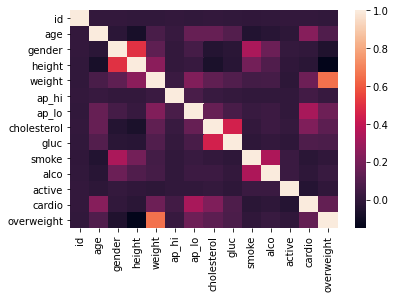

In [255]:
# plot the correlation by using seaborn's heatmap()

df_corr
figure_2 = sns.heatmap(df_corr)

In [259]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask.shape
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

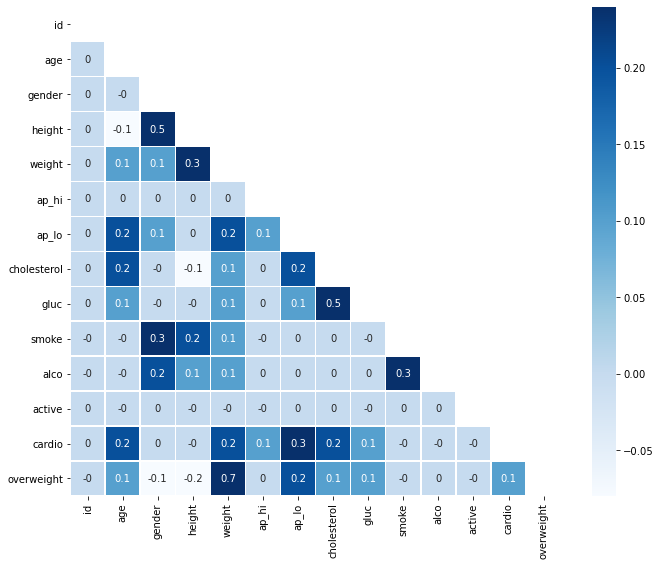

In [285]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


figure_2 = sns.heatmap(data = df_corr.round(1),mask = mask,
                        annot = True, 
                        vmin = - 0.08,
                        vmax = 0.24,
                        linecolor = 'white',
                        linewidths = 0.5,
                        cmap = 'Blues',
                       
                        )


<AxesSubplot:xlabel='age', ylabel='Count'>

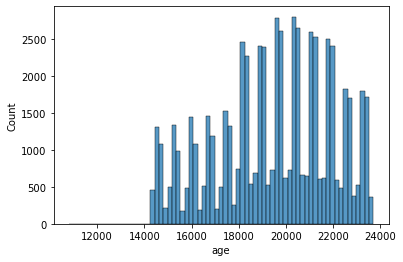

In [280]:
sns.histplot(df['age'])